In [2]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


## visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.read_parquet('data/green_tripdata_2022-01.parquet')

In [4]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,0.00,0.0,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,0.00,0.0,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,0.00,0.0,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,0.00,0.0,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN


In [5]:
df[df.trip_type == 2]  # Filter by trip_type

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
17,2,2022-01-01 00:12:00,2022-01-01 00:26:26,N,5.0,213,174,1.0,5.57,20.0,0.0,0.0,0.00,0.0,None,0.3,20.30,2.0,2.0,0.00
19,2,2022-01-01 00:54:40,2022-01-01 01:17:02,N,5.0,185,119,1.0,6.60,25.0,0.0,0.0,0.00,0.0,None,0.3,25.30,2.0,2.0,0.00
24,2,2022-01-01 00:02:43,2022-01-01 00:18:31,N,5.0,66,234,4.0,3.96,25.0,0.0,0.0,5.61,0.0,None,0.3,33.66,1.0,2.0,2.75
25,2,2022-01-01 00:45:23,2022-01-01 00:59:38,N,5.0,33,233,4.0,6.20,60.0,0.0,0.0,12.61,0.0,None,0.3,75.66,1.0,2.0,2.75
29,2,2022-01-01 00:02:14,2022-01-01 00:02:16,N,5.0,42,264,1.0,0.00,10.0,0.0,0.0,0.00,0.0,None,0.3,10.30,1.0,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56165,2,2022-01-31 23:06:05,2022-01-31 23:15:19,N,5.0,185,208,1.0,3.88,15.0,0.0,0.0,0.00,0.0,None,0.3,15.30,2.0,2.0,0.00
56166,2,2022-01-31 23:56:36,2022-02-01 00:08:29,N,5.0,185,182,1.0,3.93,12.0,0.0,0.0,0.00,0.0,None,0.3,12.30,2.0,2.0,0.00
56183,2,2022-01-31 23:44:31,2022-01-31 23:45:20,N,5.0,210,210,1.0,0.08,8.0,0.0,0.0,0.00,0.0,None,0.3,8.30,1.0,2.0,0.00
56189,2,2022-01-31 23:33:37,2022-01-31 23:33:50,N,5.0,191,191,1.0,0.00,195.0,0.0,0.0,0.00,0.0,None,0.3,195.30,2.0,2.0,0.00


In [6]:
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [7]:
df['duration']  = df.lpep_dropoff_datetime - df.lpep_pickup_datetime # obtain duration by sustracting two dates

In [8]:
df


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,0 days 00:01:12
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,0 days 00:08:43
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,0 days 00:16:12
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,0 days 00:08:15
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,0 days 00:21:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,...,0.0,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN,0 days 00:08:00
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,...,0.0,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN,0 days 00:18:00
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,...,0.0,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN,0 days 00:19:00
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,...,0.0,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN,0 days 00:10:00


In [9]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60 ) # apply to every row with lambd

In [10]:
df.duration

0         1.200000
1         8.716667
2        16.200000
3         8.250000
4        21.033333
           ...    
62490     8.000000
62491    18.000000
62492    19.000000
62493    10.000000
62494    34.000000
Name: duration, Length: 62495, dtype: float64

In [11]:
plt.style.use('fivethirtyeight')

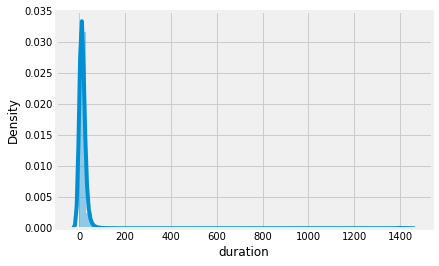

In [12]:
sns.distplot(df.duration); # visualize distribution

Long Tailed Distribution


In [13]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    62495.000000
mean        19.019387
std         78.215732
min          0.000000
50%         11.583333
95%         35.438333
98%         49.722667
99%         68.453000
max       1439.466667
Name: duration, dtype: float64

In [14]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9537242979438355

In [ ]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [16]:
from sklearn.feature_extraction import dictvectorizer

In [17]:
df[categorical] = df[categorical].astype(str)

In [18]:
df[categorical + numerical].iloc[:10].to_dict(orient="records")

[{'PULocationID': '42', 'DOLocationID': '42', 'trip_distance': 0.44},
 {'PULocationID': '116', 'DOLocationID': '41', 'trip_distance': 2.1},
 {'PULocationID': '41', 'DOLocationID': '140', 'trip_distance': 3.7},
 {'PULocationID': '181', 'DOLocationID': '181', 'trip_distance': 1.69},
 {'PULocationID': '33', 'DOLocationID': '170', 'trip_distance': 6.26},
 {'PULocationID': '150', 'DOLocationID': '210', 'trip_distance': 1.3},
 {'PULocationID': '66', 'DOLocationID': '67', 'trip_distance': 6.47},
 {'PULocationID': '40', 'DOLocationID': '195', 'trip_distance': 1.15},
 {'PULocationID': '112', 'DOLocationID': '80', 'trip_distance': 1.3},
 {'PULocationID': '256', 'DOLocationID': '186', 'trip_distance': 4.75}]

In [19]:
train_dicts = df[categorical + numerical].to_dict(orient="records")

#### Train Logistic Regression model

In [20]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [21]:
dv.feature_names_[:10] # one hot encoding 

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=111']

In [22]:
target = 'duration'
y_train = df[target].values

In [23]:
X_train

<62495x472 sparse matrix of type '<class 'numpy.float64'>'
	with 187485 stored elements in Compressed Sparse Row format>

In [24]:
y_train

array([ 1.2       ,  8.71666667, 16.2       , ..., 19.        ,
       10.        , 34.        ])

In [25]:
lr = LinearRegression() 
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_train)

In [27]:
X_train.shape,y_train.shape

((62495, 472), (62495,))

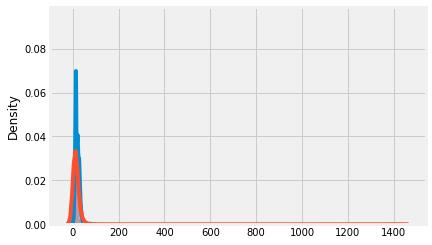

In [28]:
ax = sns.distplot(y_pred,label="predicted")
ax = sns.distplot(y_train,label="true values")


In [29]:
mse(y_train,y_pred,squared=False)

77.77314609577849

In [30]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df['duration']  = df.lpep_dropoff_datetime - df.lpep_pickup_datetime # obtain duration by sustracting two dates
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60 ) # apply to every row with lambd
    
    df = df[(df.duration >= 1 )& (df.duration <= 60)]
    
    categorical = ['PULocationID','DOLocationID']
    
    df[categorical]  = df[categorical].astype(str)
    
    return df

In [31]:
df_val = read_dataframe('data/green_tripdata_2022-01.parquet')
df_train = read_dataframe('data/green_tripdata_2022-02.parquet')

In [32]:
len(df_train),len(df_val)

(66097, 59603)

In [33]:
### TRAIN MODEL PART

categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical+numerical].to_dict(orient='records')
dv.fit(train_dicts) # refer to fit vs fit_transform
X_train = dv.transform(train_dicts)


val_dicts  = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [34]:
### SETUP TARGET 'Y'

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [35]:
X_train.shape,y_train.shape

((66097, 468), (66097,))

In [36]:
X_val.shape,y_val.shape

((59603, 468), (59603,))

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mse(y_val,y_pred,squared=False)

7.907662530080383

### Using Lasso model:

In [38]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID'] 
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID'] 

In [39]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ridge_regression

In [43]:
lasso = Lasso(alpha=0.01) 
lasso.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mse(y_val,y_pred,squared=False)

8.108804773234237

In [41]:
df_val 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,1.200000,42_42
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,8.716667,116_41
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,16.200000,41_140
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,8.250000,181_181
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,21.033333,33_170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,...,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN,8.000000,40_65
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,...,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN,18.000000,36_61
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,...,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN,19.000000,75_167
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,...,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN,10.000000,116_166


In [42]:
import pickle

In [46]:
with open('models/lin_reg.bin','wb') as f_out:
    
    pickle.dump((dv,lr),f_out)